In [1]:
%load_ext autoreload
%autoreload 2

import os

while "notebooks" in os.getcwd():
    os.chdir("..")

# Drawing ROC curves with a turtle

## Training a classifier on the Iris dataset

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from lib.drawing import draw_roc_curve_with_a_turtle, draw_roc_curve_with_multiple_turtles

In [3]:
iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

In [4]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

In [5]:
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

In [6]:
classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [7]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(75, 3)

In [8]:
label_binarizer.transform(["virginica"])

array([[0, 0, 1]])

In [9]:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

np.int64(2)

In [10]:
y_true = y_onehot_test[:, class_id]
y_pred = y_score[:, class_id]

## Draw with sklearn

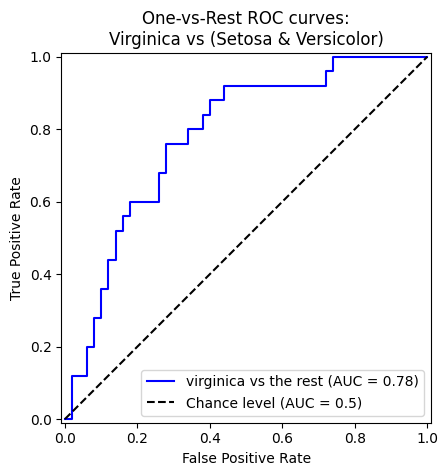

In [11]:
roc_display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="blue",
    plot_chance_level=True,
)
_ = roc_display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

## Draw with a turtle

In [12]:
draw_roc_curve_with_a_turtle(y_true, y_pred, "blue")

Canvas(height=520, width=520)

## Compare with the random classifier

In [13]:
random_scores = np.random.random(len(y_true))

In [14]:
draw_roc_curve_with_a_turtle(y_true, random_scores, "black")

Canvas(height=520, width=520)

## Race of the turtles

In [15]:
draw_roc_curve_with_multiple_turtles(y_true, [y_pred, random_scores], ["blue", "black"])

Canvas(height=520, width=520)

In [16]:
random_scores_1 = np.random.random(len(y_true))
random_scores_2 = np.random.random(len(y_true))
random_scores_3 = np.random.random(len(y_true))
draw_roc_curve_with_multiple_turtles(y_true, [y_pred, random_scores, random_scores_1, random_scores_2, random_scores_3], ["blue", "black", "black", "black", "black"])

Canvas(height=520, width=520)

## Logistic regression vs SVM race

In [17]:
y_onehot_train = label_binarizer.transform(y_train)

In [18]:
train_labels = y_onehot_test[:, class_id]

In [19]:
train_labels

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0])

In [20]:
X_train

array([[ 5.4       ,  3.9       ,  1.3       , ..., -0.46397796,
        -1.52208557,  0.23352742],
       [ 5.6       ,  2.5       ,  3.9       , ..., -0.03157472,
         0.30253713,  0.47783207],
       [ 5.7       ,  4.4       ,  1.5       , ..., -0.03818131,
        -0.61738596,  0.37894461],
       ...,
       [ 6.5       ,  3.        ,  5.8       , ..., -0.66241674,
         0.22992842, -0.39345333],
       [ 5.8       ,  2.7       ,  3.9       , ...,  1.22536528,
        -0.83526295, -0.43997469],
       [ 4.9       ,  3.1       ,  1.5       , ...,  0.4666787 ,
        -1.90542325, -0.33794381]])

In [21]:

svm_model = SVC()

In [22]:
svm_model.fit(X_train, train_labels)

SVC()

In [23]:
y_pred_svm = svm_model.decision_function(X_test)

In [24]:
random_scores_1 = np.random.random(len(y_true))
draw_roc_curve_with_multiple_turtles(y_true, [y_pred, y_pred_svm, random_scores_1], ["blue", "green", "black"])

Canvas(height=520, width=520)

In [25]:
svm_model.intercept_

array([-0.62547731])

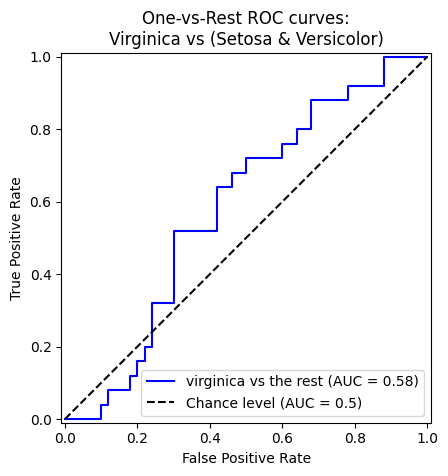

In [26]:
roc_display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred_svm,
    name=f"{class_of_interest} vs the rest",
    color="blue",
    plot_chance_level=True,
)
_ = roc_display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)